#                                 **MEDICAL COSTS DATASET**

**PROBLEM STATEMENT**

Objective:
To analyze a medical cost dataset (insurance.csv) and understand the relationship between medical insurance charges and other demographic and health-related variables.

Target Variable:
charges (continuous): Represents the medical insurance cost charged to individuals.

**Project Summary**

This project analyzes the Medical Insurance Cost Dataset with the aim to explore how variables like age, gender, BMI, smoking habits, number of children, and region affect medical charges. It includes data cleaning, visualization, transformation, and possibly predictive modeling.

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Dataset**

In [ ]:
med = pd.read_csv('/content/insurance.csv')

**INITIAL EXPLORATION OF DATA**

**Inspecting first five rows**

In [ ]:
med.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Target Variable: charges(continuous)**

In [ ]:
med.shape

(1338, 7)

Rows: 1338

Columns: 7

**Inspecting the datatypes**

In [ ]:
med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical columns: sex,smoker,region

**Checking the summary of continuous data**

In [ ]:
med.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


**Inspecting the missing values**

In [ ]:
med.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


There are no null values in the dataset.

**Checking for duplicate values**

In [ ]:
med.duplicated().sum()

np.int64(1)

There is a single duplicate value in the dataset. Let us delete it.

In [ ]:
med = med.drop_duplicates()
med.shape

(1337, 7)

# **Analysis of Categorical Columns**

**UNIVARIATE ANALYSIS**

***Gender***

In [ ]:
med['sex'].value_counts()

,count
sex,
male,675
female,662


Text(0.5, 1.0, 'Distribution of Gender')

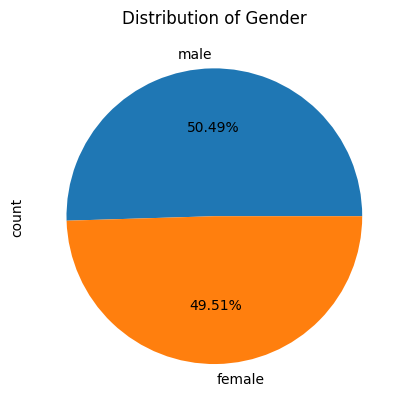

In [ ]:
med['sex'].value_counts().plot(kind='pie',autopct='%2.2f%%')
plt.title('Distribution of Gender')

From the above pie chart it is observed that the proportion of males is 50.49% and that of females is 49.51%.
This says that there is no great difference b/w proportions of Gender.

***Children***

In [ ]:
med['children'].value_counts()

,count
children,
0,573
1,324
2,240
3,157
4,25
5,18


Since we got value_counts we can treat this column as a categorical column.

Text(0.5, 1.0, 'Distribution of Children')

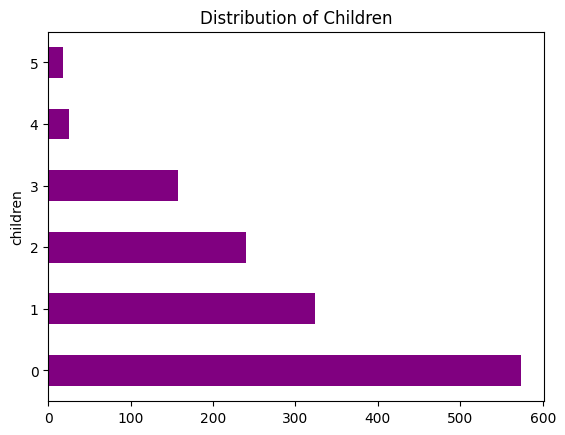

In [ ]:
med['children'].value_counts().plot(kind='barh',color='purple')
plt.title('Distribution of Children')

On observing the above barchart , we can say that there are maximum number of individuals  with no children .

***smoker***

In [ ]:
med['smoker'].value_counts()

,count
smoker,
no,1063
yes,274


Text(0.5, 1.0, 'Distribution of smokers and non smokers')

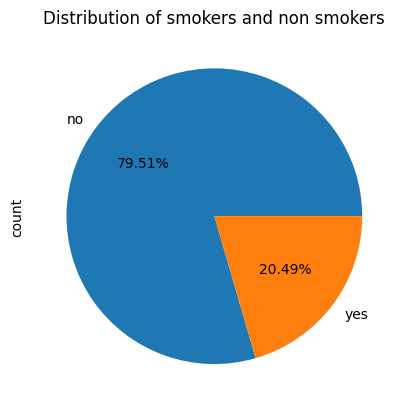

In [ ]:
med['smoker'].value_counts().plot(kind='pie',autopct='%1.2f%%',labels=med['smoker'].value_counts().index)
plt.title('Distribution of smokers and non smokers')

Almost 79.51% are non-smokers and only 20.49% are smokers.

***region***

In [ ]:
med['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


Text(0.5, 1.0, 'Distribution of Individuals across regions')

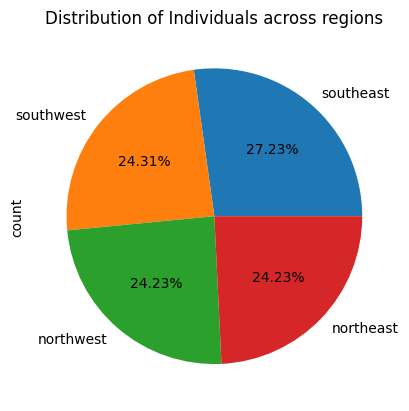

In [ ]:
med['region'].value_counts().plot(kind='pie',autopct='%2.2f%%')
plt.title('Distribution of Individuals across regions')

Majority of the individuals belong to the southeast region while there is almost equal distribution of individuals across all three regions.

**BIVARIATE ANALYSIS**

Text(0.5, 0, 'Gender')

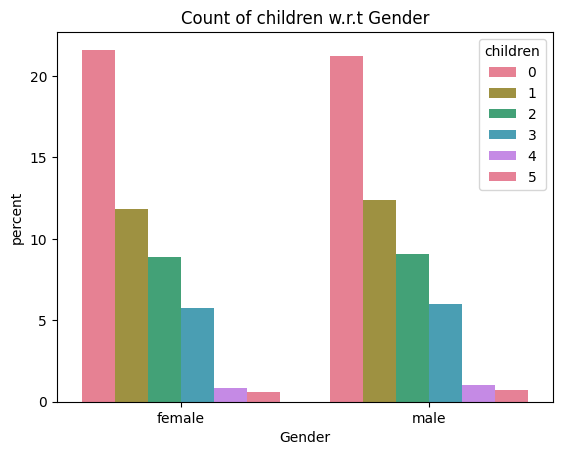

In [ ]:
sns.countplot(data=med,x='sex',hue='children',stat='percent',palette='husl')
plt.title('Count of children w.r.t Gender')
plt.xlabel('Gender')

There is almost equal number of children to males and females in the dataset.

Text(0.5, 0, 'Gender')

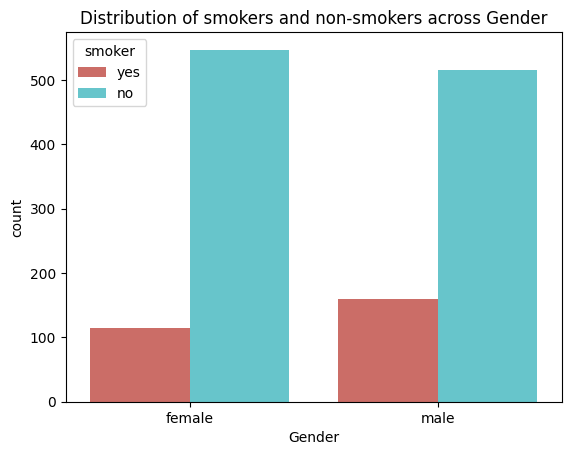

In [ ]:
sns.countplot(data=med,x='sex',hue='smoker',palette='hls')
plt.title('Distribution of smokers and non-smokers across Gender')
plt.xlabel('Gender')

The majority of non-smokers come from females and that of smokers from males.

Text(0.5, 0, 'Gender')

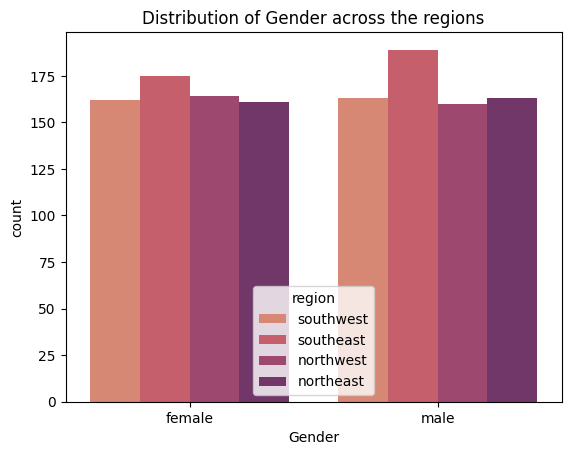

In [ ]:
sns.countplot(data=med,x='sex',hue='region',palette='flare')
plt.title('Distribution of Gender across the regions')
plt.xlabel('Gender')

We can see that majority of females and males belong to the southeast region.

Text(0.5, 1.0, 'Distribution of smokers among individuals according to their number of children')

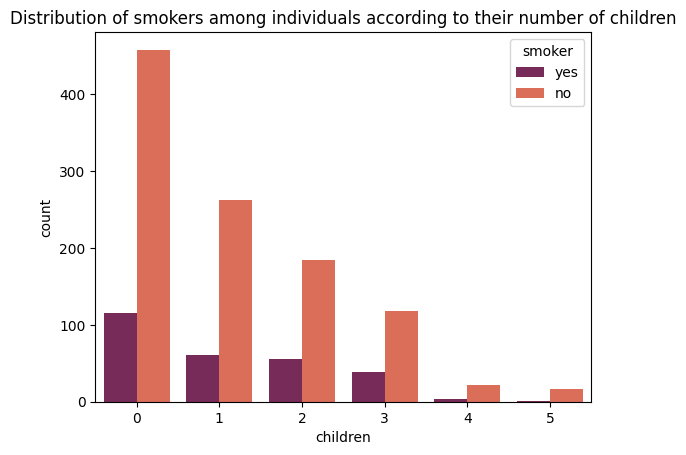

In [ ]:
sns.countplot(data=med,x='children',hue='smoker',palette='rocket')
plt.title('Distribution of smokers among individuals according to their number of children')

There are more smokers from families who have no children and this can be observed in  the decreasing trend.

That means the individuals with 0 or no children are more likely to smoke when compared to those who have 1,2,3,4, and 5 children.

Text(0.5, 1.0, 'Distribution of individuals based on the number of children according to the region')

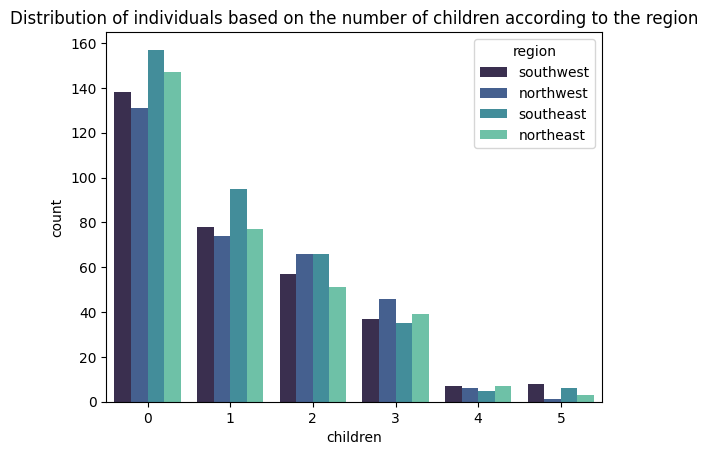

In [ ]:
sns.countplot(data=med,x='children',hue='region',palette='mako')
plt.title('Distribution of individuals based on the number of children according to the region')

Majority of People with no children belong to the southeast region.

People with one child  mostly belong to the southeast region.

People with two children majorly come from southeast and northwest regions.

People with three children mostly belong to southeast region.

People with four and five children majorly belong to the southwest region.

Text(0.5, 1.0, 'Distribution of smokers and non-smokers according to the region')

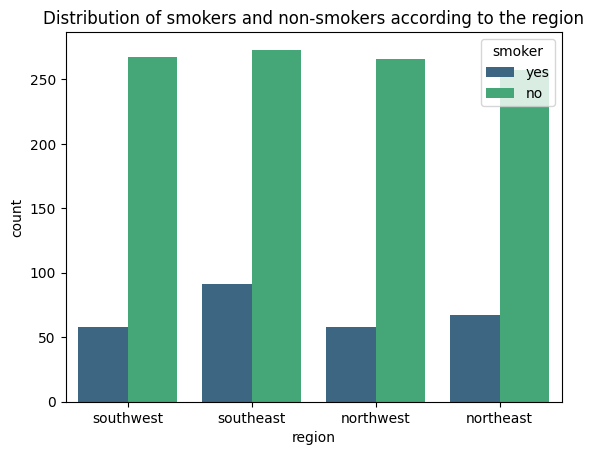

In [ ]:
sns.countplot(data=med,x='region',hue='smoker',palette='viridis')
plt.title('Distribution of smokers and non-smokers according to the region')

Majority of smokers originate from southeast region , some from northeast and few from both southwest and northwest regions.

# **Analysis of Continuous Data**

<Axes: >

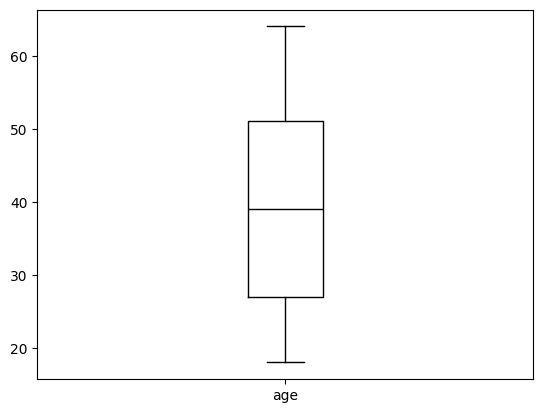

In [ ]:
med['age'].plot(kind='box',color='black')

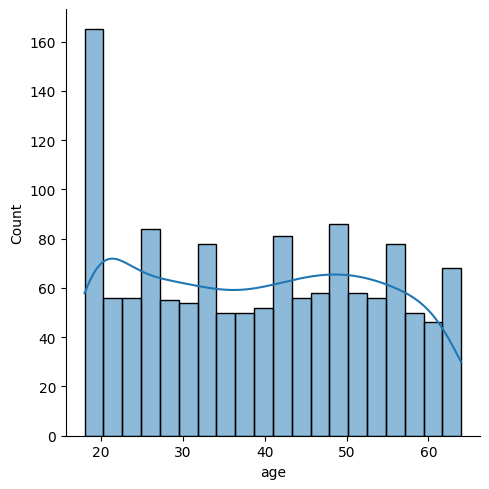

In [ ]:
sns.displot(data=med,x='age',bins = 20,kde=True)

By observing the above boxplot and displot we can see that there are no outliers in the 'Age' column.

<Axes: >

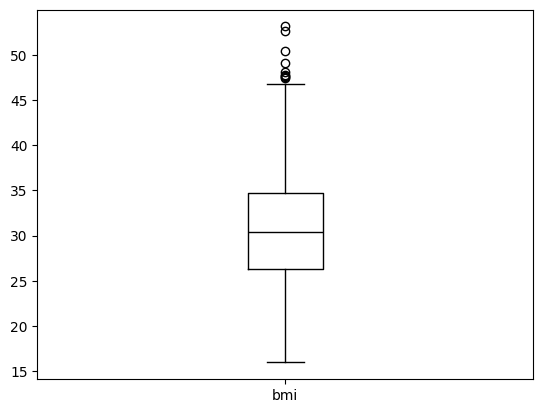

In [ ]:
med['bmi'].plot(kind='box',color='black')

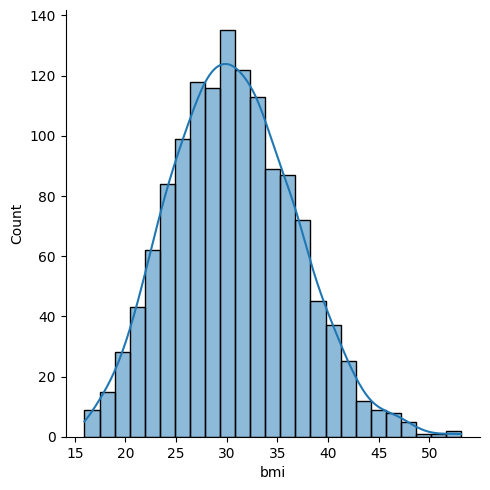

In [ ]:
sns.displot(data=med,x='bmi',kde=True)

From the boxplot we can see that there are some outliers in the bmi column whereas from the above displot we can see that the bmi is  almost evenly distributed.


<Axes: >

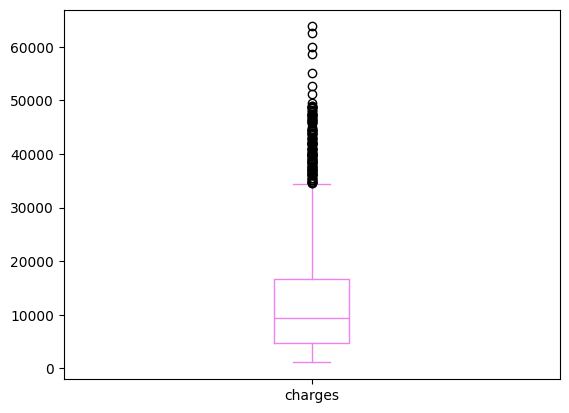

In [ ]:
med['charges'].plot(kind='box',color='violet')

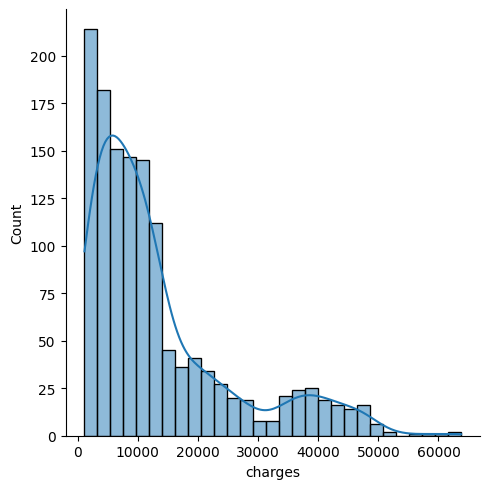

In [ ]:
sns.displot(data=med,x='charges',kde=True)

The boxplot for charges contains outliers and also from the displot we can say clearly that there are outliers as  the graph is rightly skewed.

So we need to remove outliers from this column also.

**REMOVING OUTLIERS**

*LOG TRANSFORMATION OF TARGET VARIABLE*

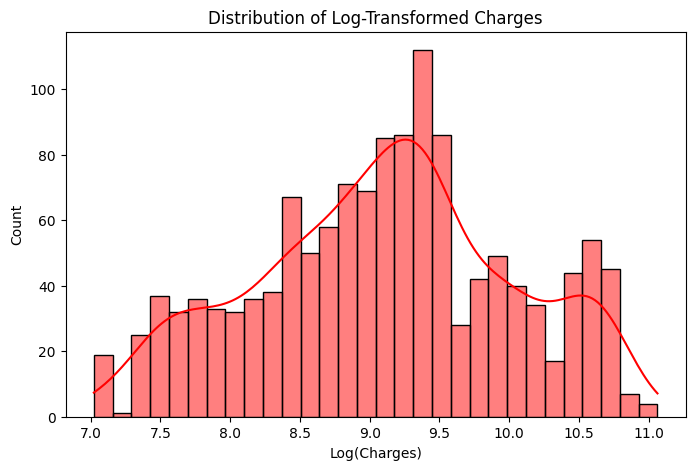

In [ ]:
med['charges'] = np.log(med['charges'])

# Plot the transformed distribution
plt.figure(figsize=(8, 5))
sns.histplot(med['charges'],bins = 30, kde=True,color='red')
plt.xlabel("Log(Charges)")
plt.ylabel("Count")
plt.title("Distribution of Log-Transformed Charges")
plt.show()

Applied the log transformation to reduce the skewness in the data for the target variable.Since removal of outliers doesn't make the distribution less skewed so applying log transformation is better.

In [ ]:
med.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.000000,27.00000,39.000000,51.000000,64.000000
bmi,1337.0,30.663452,6.100468,15.960000,26.29000,30.400000,34.700000,53.130000
children,1337.0,1.095737,1.205571,0.000000,0.00000,1.000000,2.000000,5.000000
charges,1337.0,9.099928,0.918699,7.022756,8.46513,9.146992,9.720629,11.063045


*Removing outliers in bmi*

In [ ]:
q1 = med['bmi'].quantile(0.25)
q3 = med['bmi'].quantile(0.75)
iqr = q3 - q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr

med = med[(med['bmi'] >= lower) & (med['bmi'] <= upper)]

<Axes: >

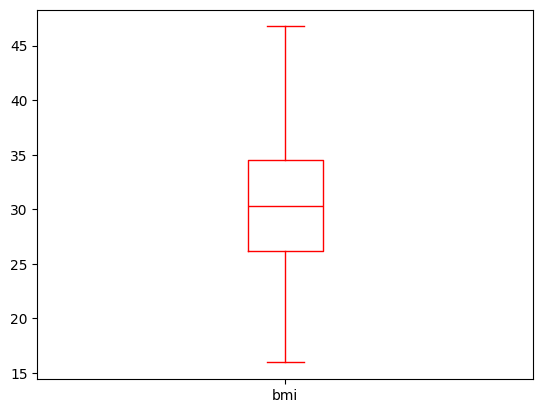

In [ ]:
med['bmi'].plot(kind='box',color='red')

# **CATEGORICAL VS CONTINUOUS (COMPARISON)**

<Axes: xlabel='sex', ylabel='age'>

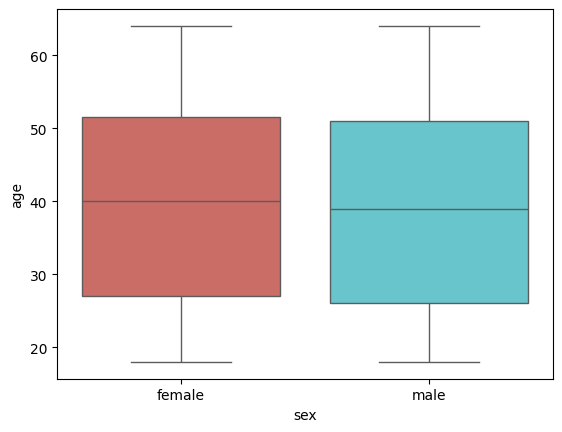

In [ ]:
sns.boxplot(data=med,x='sex',y='age',hue='sex',palette='hls')

Median age of females is  40 years and of males is between 35 and 40.

<Axes: xlabel='sex', ylabel='bmi'>

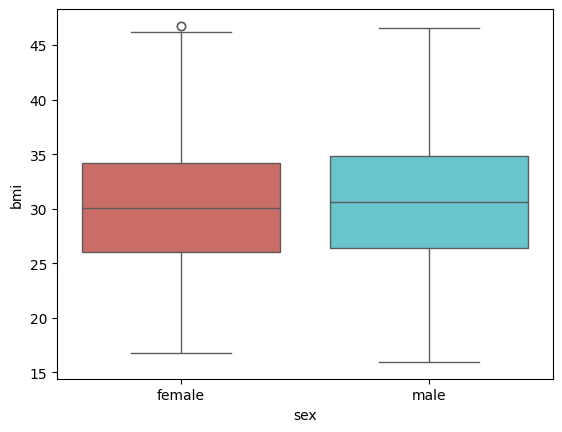

In [ ]:
sns.boxplot(data=med,x='sex',y='bmi',hue='sex',palette='hls')

Median bmi for females: 30

Median bmi for males: b/w 30 and 32

<Axes: xlabel='smoker', ylabel='age'>

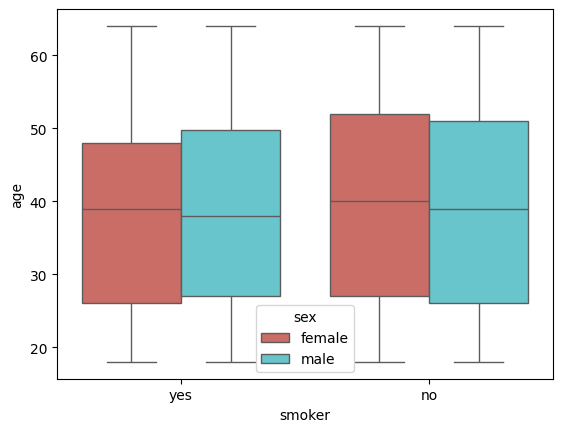

In [ ]:
sns.boxplot(data=med,x='smoker',y='age',hue='sex',palette='hls')

Median age of smokers:

*   Females: b/w 35 and 40 (likely 39)
*   Males: b/w 35 and 40 (likely 38)

Median age of non-smokers:

*   Females: 40
*   Males: b/w 35 and 40 (likely 39)

<Axes: xlabel='smoker', ylabel='bmi'>

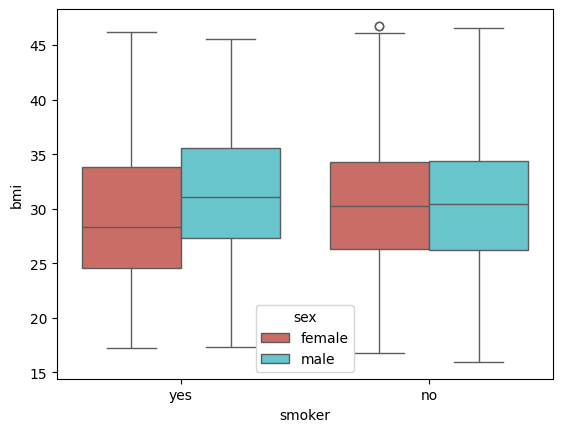

In [ ]:
sns.boxplot(data=med,x='smoker',y='bmi',hue='sex',palette='hls')

Median bmi of smokers:

Females: b/w 25 and 30 (likely 28)
Males: b/w 30 and 35 (likely 32)

Median bmi of non-smokers:

Females:b/w 30 and 35(likely 31)
Males: b/w 35 and 40 (likely 31.5)

<Axes: xlabel='age', ylabel='bmi'>

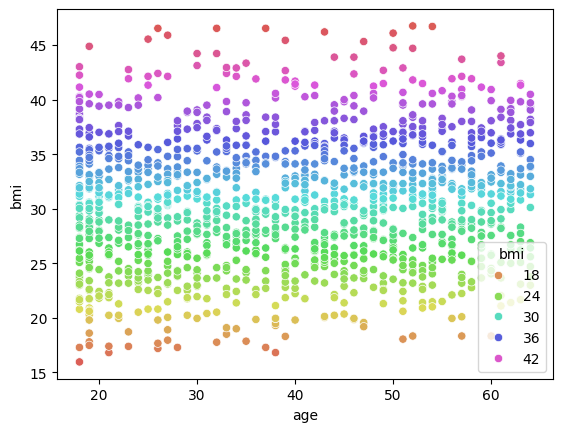

In [ ]:
sns.scatterplot(data=med,x='age',y='bmi',hue='bmi',palette='hls')

<Axes: xlabel='age', ylabel='charges'>

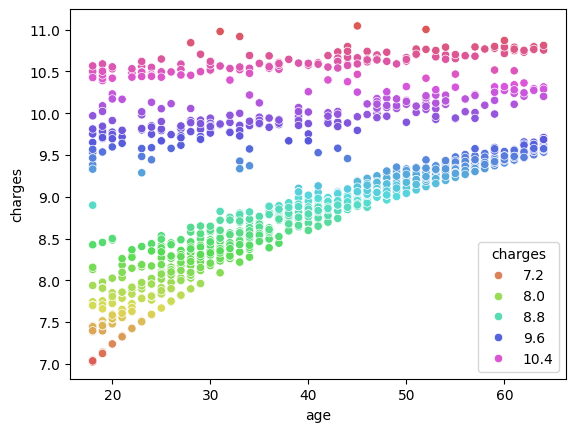

In [ ]:
sns.scatterplot(data=med,x='age',y='charges',hue='charges',palette='hls')

<Axes: xlabel='region', ylabel='charges'>

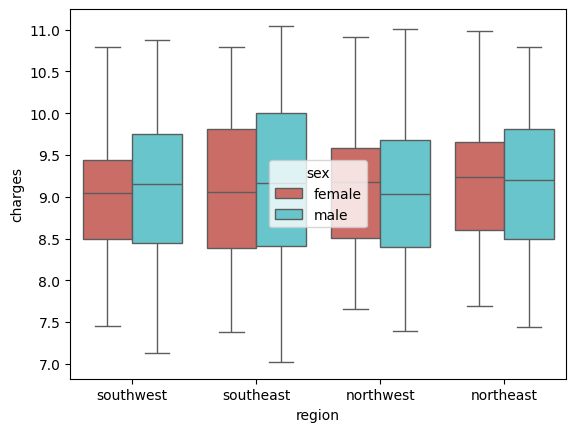

In [ ]:
sns.boxplot(data=med,x='region',y='charges',hue='sex',palette='hls')

Maximum charges come from southeast region that too from males, while minimum charges come from northeast region males.

<Axes: xlabel='sex', ylabel='charges'>

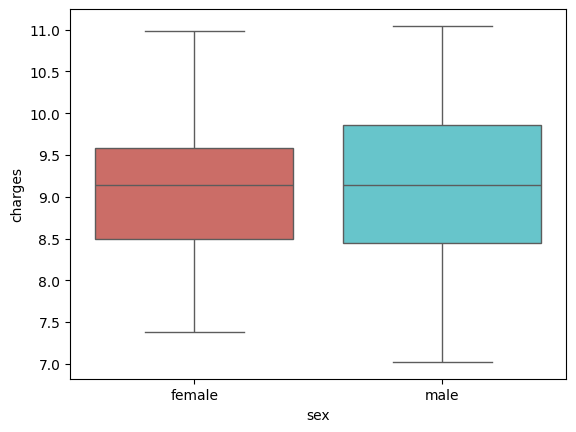

In [ ]:
sns.boxplot(data=med,x='sex',y='charges',hue='sex',palette='hls')

The median charges of males and females are almost equal.

In [ ]:
med.shape

(1328, 7)

In [ ]:
med['sex'].value_counts()

,count
sex,
male,669
female,659


In [ ]:
med['smoker'].value_counts()

,count
smoker,
no,1057
yes,271


In [ ]:
med['region'].value_counts()

,count
region,
southeast,357
southwest,324
northwest,324
northeast,323


# **ENCODING CATEGORICAL COLUMNS**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


med['sex'] = le.fit_transform(med['sex'])
med['smoker'] = le.fit_transform(med['smoker'])
med['region'] = le.fit_transform(med['region'])

In [ ]:
med.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,9.734176
1,18,1,33.770,1,0,2,7.453302
2,28,1,33.000,3,0,2,8.400538
3,33,1,22.705,0,0,1,9.998092
4,32,1,28.880,0,0,1,8.260197


In [ ]:
med['sex'].value_counts()

,count
sex,
1,669
0,659


male = 1, female = 0

In [ ]:
med['smoker'].value_counts()

,count
smoker,
0,1057
1,271


smoker :1 , non-smoker:0

In [ ]:
med['region'].value_counts()

,count
region,
2,357
3,324
1,324
0,323


northeast:0,northwest:1,southwest:2,northwest:3

# **FEATURE SCALING**

In [ ]:
med.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1328.0,39.219127,14.042170,18.000000,27.000000,39.000000,51.000000,64.000000
sex,1328.0,0.503765,0.500174,0.000000,0.000000,1.000000,1.000000,1.000000
bmi,1328.0,30.537308,5.922176,15.960000,26.220000,30.300000,34.488750,46.750000
children,1328.0,1.097139,1.208008,0.000000,0.000000,1.000000,2.000000,5.000000
smoker,1328.0,0.204066,0.403169,0.000000,0.000000,0.000000,0.000000,1.000000
region,1328.0,1.513554,1.106859,0.000000,1.000000,2.000000,2.000000,3.000000
charges,1328.0,9.098318,0.915637,7.022756,8.464704,9.145227,9.717415,11.044407


In [ ]:
from sklearn.preprocessing import StandardScaler

target = 'charges'
scaler = StandardScaler()
feature_columns = [col for col in med.columns if col != target]
med[feature_columns] = scaler.fit_transform(med[feature_columns])

In [ ]:
med.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.440429,-1.007559,-0.445495,-0.908563,1.974935,1.343447,9.734176
1,-1.511669,0.992498,0.546068,-0.080442,-0.506346,0.439649,7.453302
2,-0.799261,0.992498,0.415999,1.575799,-0.506346,0.439649,8.400538
3,-0.443056,0.992498,-1.323037,-0.908563,-0.506346,-0.464149,9.998092
4,-0.514297,0.992498,-0.279953,-0.908563,-0.506346,-0.464149,8.260197


# **TRAIN-TEST-SPLIT**

In [ ]:
y=med['charges']
x=med.drop(columns={'charges'})

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(1062, 6)
(1062,)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(266, 6)
(266,)


In [ ]:
from sklearn.linear_model import LinearRegression

# create a linear regression model
model = LinearRegression()

# fit the model to the training data
model.fit(x_train, y_train)
r2_score = model.score(x_test,y_test)
print(r2_score*100,'%')

80.5079076586597 %


In [ ]:
# get the optimal values for the slope and intercept
slope = model.coef_
intercept = model.intercept_

# **Insights after data pre-processing , analysis and model fitting**

This project analyzes the Medical Insurance Cost Dataset with the aim to explore how variables like age, gender, BMI, smoking habits, number of children, and region affect medical charges. It includes data cleaning, visualization, transformation, and possibly predictive modeling.

**Initial Exploration**

•	Dataset loaded using pandas and has 1338 records.

•	No missing values.

•	Removed duplicate entries to ensure data integrity.


**Univariate Analysis:**

Categorical Variables:


*   sex, smoker, region, children were analyzed using pie and bar plots.
*   Most individuals are non-smokers.
*   Gender is nearly balanced.
*   Southeast region has the highest representation.

Numerical Variables:

*   age, bmi, and charges distributions examined using histograms and box plots
*   Charges were right-skewed, hence log-transformed for normalization.
*   BMI outliers were handled using IQR-based filtering.

**Bivariate Analysis**

Smokers vs Non-Smokers:

*   Smokers pay significantly more in charges.
*   Smoking status shows a strong influence on medical cost.

Age vs Charges:

*   Charges increase with age.
*   Visualized using scatter plots colored by intensity of charges.

BMI Analysis:

*   Higher BMI correlates with higher charges, especially among smokers.
*   Age and BMI were also studied together.

Region & Gender:

*   Some demographic trends seen, but not as influential on charges.

**Transformations and Feature Engineering**

•	Encoding categorical variables:sex,smoker and region using Label Encoding.

•	Log transformation applied to charges to handle skewness.

•	BMI outliers removed using IQR filtering.

•	Data visualizations updated post-cleaning for better accuracy.

**Modeling**

•	Splitting into train and test datasets.

•	Regression modeling (Linear Regression)

•	Accuracy Score (80%) and Evaluation metrics: R²


**Interpretation**

*   Smoker:	Smokers pay drastically more, health risk indicator.
*   Age:	Older individuals incur more charges.
*   BMI: High BMI(especially for smokers) linked to more cost due to potential
     health issues.
*   Children:	No strong link found with medical cost.
*   Region:	Region does not significantly affect cost.
*   Sex:Gender doesn't heavily impact charges.
